### Проект 5 [Одобрение кредита]

Вам предоставляется набор данных. Набор данных уже разделен на ```train_data.csv``` и ```test_data.csv```.

**Цель:** построить модели для **одобрения кредита** (```"Credit Default"```).

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.

**Примечание:** вам **рекомендуется** искать так же другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test_data.csv```.

In [1]:
import pandas as pd

train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [2]:
# Вывод первых 5 строк тренировочного датасета
train_data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Home Mortgage,NaN,10+ years,0.0,10.0,21.8,267762.0,0.0,NaN,0.0,debt consolidation,Short Term,193358.0,140372.0,19404.0,NaN,0
1,Rent,767904.0,1 year,0.0,9.0,15.4,275528.0,0.0,73.0,0.0,debt consolidation,Short Term,222288.0,168226.0,18302.0,718.0,0
2,Own Home,NaN,9 years,0.0,14.0,27.1,1635590.0,1.0,NaN,0.0,debt consolidation,Short Term,433268.0,1017032.0,15295.0,NaN,0
3,Home Mortgage,1267395.0,3 years,0.0,11.0,11.8,137676.0,1.0,61.0,0.0,home improvements,Short Term,99999999.0,34124.0,25559.0,719.0,0
4,Rent,1813493.0,7 years,0.0,19.0,14.0,501556.0,0.0,6.0,0.0,debt consolidation,Short Term,265232.0,114779.0,23877.0,713.0,0


In [3]:
# Информация о данных
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                6750 non-null   object 
 1   Annual Income                 5350 non-null   float64
 2   Years in current job          6418 non-null   object 
 3   Tax Liens                     6750 non-null   float64
 4   Number of Open Accounts       6750 non-null   float64
 5   Years of Credit History       6750 non-null   float64
 6   Maximum Open Credit           6750 non-null   float64
 7   Number of Credit Problems     6750 non-null   float64
 8   Months since last delinquent  3075 non-null   float64
 9   Bankruptcies                  6738 non-null   float64
 10  Purpose                       6750 non-null   object 
 11  Term                          6750 non-null   object 
 12  Current Loan Amount           6750 non-null   float64
 13  Cur

In [4]:
# Статистическое описание
train_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.350000e+03,6750.000000,6750.000000,6750.000000,6.750000e+03,6750.000000,3075.000000,6738.000000,6.750000e+03,6.750000e+03,6750.000000,5350.000000,6750.000000
mean,1.368478e+06,0.029333,11.129037,18.325393,9.048968e+05,0.169778,34.737886,0.118433,1.187307e+07,2.888319e+05,18339.610815,1147.825234,0.285185
std,8.443128e+05,0.268953,4.902738,7.076157,1.622644e+07,0.497055,21.732259,0.348344,3.192640e+07,3.214734e+05,11930.628435,1599.628242,0.451536
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.459892e+05,0.000000,8.000000,13.500000,2.795375e+05,0.000000,16.000000,0.000000,1.796190e+05,1.126748e+05,10068.750000,711.000000,0.000000
50%,1.170913e+06,0.000000,10.000000,17.000000,4.771140e+05,0.000000,32.000000,0.000000,3.099360e+05,2.084490e+05,16161.000000,731.000000,0.000000
75%,1.643780e+06,0.000000,14.000000,21.800000,7.906250e+05,0.000000,50.000000,0.000000,5.194750e+05,3.598838e+05,23900.500000,743.000000,1.000000
max,9.338880e+06,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [5]:
# Подсчет количества отсутствующих значений в каждом столбце
train_data.isnull().sum()

Home Ownership                     0
Annual Income                   1400
Years in current job             332
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    3675
Bankruptcies                      12
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1400
Credit Default                     0
dtype: int64

In [6]:
# Замена отсутствующих значений в столбце "Bankruptcies" средним значением
mean_bankruptcies = train_data['Bankruptcies'].mean()
train_data['Bankruptcies'].fillna(mean_bankruptcies, inplace=True)

In [7]:
# Замена отсутствующих значений в столбце "Months since last delinquent" нулем
train_data['Months since last delinquent'].fillna(0, inplace=True)

In [8]:
# Обработка выбросов в столбце "Credit Score" (замена значений выше 800 на медиану)
median_credit_score = train_data['Credit Score'].median()
train_data.loc[train_data['Credit Score'] > 800, 'Credit Score'] = median_credit_score

In [9]:
# Преобразование категориальной переменной "Home Ownership" в числовую с помощью one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Home Ownership'], prefix='Home')

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_data['Years in current job'] = le.fit_transform(train_data['Years in current job'].astype(str).values)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Применение кодирования меток к категориальной переменной
label_encoder = LabelEncoder()
train_data["Purpose_Encoded"] = label_encoder.fit_transform(train_data["Purpose"])

# Удаление столбца "Purpose"
train_data.drop("Purpose", axis=1,inplace=True)

In [12]:
# Применение кодирования меток к категориальной переменной
label_encoder = LabelEncoder()
train_data["Term_Encoded"] = label_encoder.fit_transform(train_data["Term"])

# Удаление столбца "Term"
train_data.drop("Term", axis=1,inplace=True)

<Axes: xlabel='Credit Default', ylabel='count'>

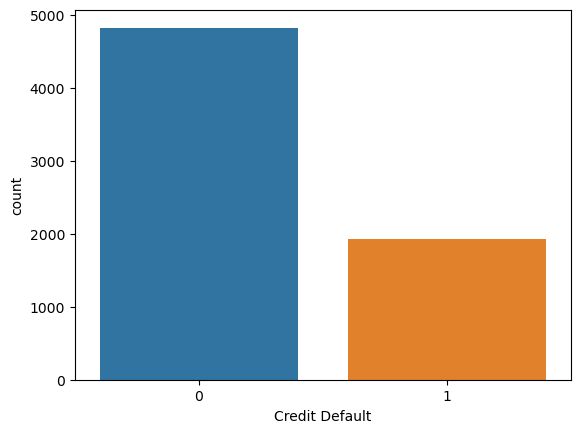

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация распределения значений в столбце "Credit Default"
sns.countplot(x='Credit Default', data=train_data)

<Axes: >

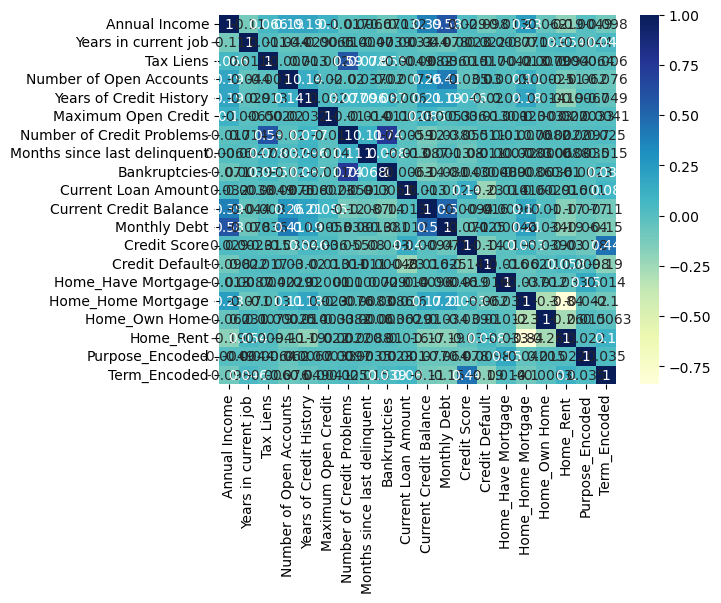

In [14]:
# Визуализация корреляционной матрицы
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

<Axes: xlabel='Credit Default', ylabel='Annual Income'>

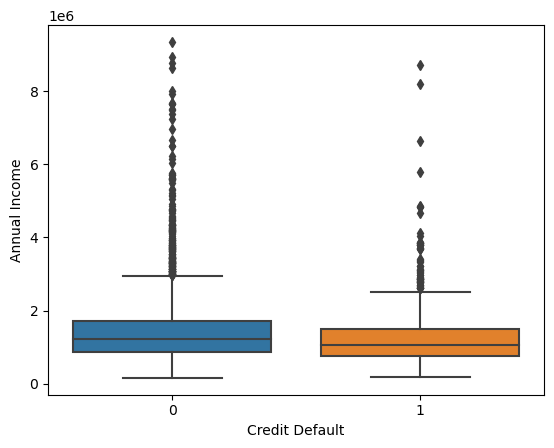

In [15]:
# Визуализация зависимости между "Annual Income" и "Credit Default"
sns.boxplot(x='Credit Default', y='Annual Income', data=train_data)

In [16]:
X = train_data.drop('Credit Default', axis=1)
y = train_data['Credit Default']

In [17]:
from sklearn.model_selection import train_test_split

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.impute import SimpleImputer

# Создание экземпляра Imputer с заполнением отсутствующих значений медианой
imputer = SimpleImputer(strategy='median')

# Заполнение отсутствующих значений в тренировочном наборе
X_train_filled = imputer.fit_transform(X_train)

# Заполнение отсутствующих значений в тестовом наборе
X_test_filled = imputer.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Создание экземпляров моделей
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Обучение моделей
logreg.fit(X_train_filled, y_train)
dt.fit(X_train_filled, y_train)
rf.fit(X_train_filled, y_train)

RandomForestClassifier()

In [20]:
from sklearn.metrics import classification_report

# Предсказание на тестовом наборе
logreg_pred = logreg.predict(X_test_filled)
dt_pred = dt.predict(X_test_filled)
rf_pred = rf.predict(X_test_filled)

# Оценка моделей
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       958
           1       0.40      0.01      0.01       392

    accuracy                           0.71      1350
   macro avg       0.56      0.50      0.42      1350
weighted avg       0.62      0.71      0.59      1350

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       958
           1       0.44      0.48      0.46       392

    accuracy                           0.67      1350
   macro avg       0.61      0.62      0.61      1350
weighted avg       0.68      0.67      0.68      1350

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       958
           1       0.66      0.30      0.41       392

    accuracy                           0.75      1350
   macro av

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Вычисление метрик для Logistic Regression
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

# Вычисление метрик для Decision Tree
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# Вычисление метрик для Random Forest
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Вывод метрик для каждой модели
print("Logistic Regression Metrics:")
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)

print("Decision Tree Metrics:")
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

print("Random Forest Metrics:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Logistic Regression Metrics:
Precision: 0.4
Recall: 0.00510204081632653
F1-score: 0.010075566750629721
Decision Tree Metrics:
Precision: 0.44208037825059104
Recall: 0.4770408163265306
F1-score: 0.45889570552147246
Random Forest Metrics:
Precision: 0.6647727272727273
Recall: 0.29846938775510207
F1-score: 0.4119718309859155
